# Integrators in TVB

__What are the Roles of Integrators in TVB?__
+ This notebook will serve as a an introductory guide to understanding how different integrators work in TVB. 

+ To whomever is reading this,  I strongly advice to read this document line by line, as I have done my best to boil it down to the most essential information needed to understand both the numerical solving of differential equations, as well as what role they play in TVB.

+ In order to do so, it is necessary to cover the basic programming and mathematical building blocks that make up numerical integrators.

+ As such, we will start with the basics of deterministic integrators, move on to stochastic integrators and then show how they are used to solve neural mass models. 

+ As the notebook is structured in such a way that the different concepts build on top of each other I would advise to run each cell yourself and try out different functions and examples to make sure that you have really understood the concepts, maybe even a pen an paper. 


__Structure of the notebook:__

1. Differential equations
2. Determinstic Integrators 
+ 2.1. Explicit Euler Method
+ 2.2. Runge-Kutta Methods 
+ 2.2.1. RK1 Method
+ 2.2.2. RK2 Method / Heun's Method
+ 2.2.3. RK3 Method 
+ 2.2.4. RK4 Method
+ 2.2.5 Comparing the different RK-Methods
+ 2.3. A note on step size
+ 2.4 Dormand-Prince Method
3. Stochastic Integrators 
+ 3.1. Stochastic Euler Method

4. Coupled ODEs
+ 4.1. Neural Mass Model: The Jansen-Rit Model
+ 4.2. Stochastic Neural Mass Model 
5. TVB integrator comparison 
+ 5.1. Noise in TVB
+ 5.2. Which integrator should I use in TVB?
 Now, without further ado, let's get started.

In [24]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
from vpython import *
from mpl_toolkits.mplot3d import Axes3D

<IPython.core.display.Javascript object>

# 1. Differential equations

Differential equations are mathematical equations that describe how a certain quantity changes in relation to other variables. In simpler terms, they help us understand the relationship between variables and how one variable changes as another variable changes. 
Differential equations can describe nearly all systems undergoing change. They are ubiquitous in science and
engineering as well as economics, social science, biology, business, health care, etc. Many mathematicians have
studied the nature of these equations for hundreds of years and there are many well-developed solution techniques.
Often, systems described by differential equations are so complex, or the systems that they describe are so large,
that a purely analytical solution to the equations is not tractable. It is in these complex systems where computer
simulations and numerical methods are useful.
The techniques for solving differential equations based on numerical approximations were developed before
programmable computers existed. During World War II, it was common to find rooms of people (usually women)
working on mechanical calculators to numerically solve systems of differential equations for military calculations.
Before programmable computers, it was also common to exploit analogies to electrical systems to design analog
computersto study mechanical, thermal, or chemicalsystems. As programmable computers have increased in speed
and decreased in cost, increasingly complex systems of differential equations can be solved with simple programs
written to run on a common computer. Currently, the computer on your desk can tackle problems that were inaccessible
to the fastest supercomputers just 5 or 10 years ago.

Differential equations involve derivatives, which are a measure of how a function changes with respect to its variables. Derivatives can be thought of as the "rate of change" or the "slope" of a function at a particular point.

Now, let's talk about ordinary differential equations (ODEs). These are a specific type of differential equation that involves a single independent variable and one or more dependent variables. In other words, ODEs describe the relationship between a variable and its derivatives with respect to only one other variable.

A differential equation can often only be solved numerically.

+ There is a difference between a "right" and numerical solution: The square root of 2 is irrational, but it can be numerically approximated by 1.41.
+ Not only numbers can be numerically approximated - functions can be numerically approximated too: 
+ For example, f(x)= sin(x) can be approximated through a number of (x,y)-points that are elements of sin(x). 

+ So why do we do this? Analytical solutions, while providing the accurate solution, are not always possible. Many differential equations do not have a closed-form solution. 

Numerical methods offer us an approximation of the true solution. Different integration methods can be used. 
__questions to be asked here are:__
+ Error Analysis: How good is our approximation?
+ How many time steps are needed?
+ Algorithmic design: How efficient is our method?
+ Does our method always work? 




# 2. Determinstic Integrators

## 2. 1. Explicit Euler Method 

To start with, let us have a look at the Explicit Euler Method. THe Explicit Euler method is a first-order numerical method used to solve ordinary differential equations (ODEs).
It approximates the solution of an ODE at discrete points in time by using the derivative at the current time to predict the value at the next time step.
The explicit Euler method has a simple implementation and is easy to understand, but it may not be very accurate for stiff ODEs or large time step sizes.

__In order to run the Euler Method, the following has to be specified:__

+ the function f, that is the explicit differential equation

+ the initial value, x0, y0

+ the step size h,

+ n: the number of points that are going to be calculated. 

![convert notebook to web app](https://raw.githubusercontent.com/pranabendra/articles/master/Euler-method/images/Euler.png)


+ The method uses the idea of local linearity or linear approximation, where we use small tangent lines over a short distance to approximate the solution to an initial-value problem.

+ If we zoom in small enough, every curve looks like a straight line, and therefore, the Tangent Line is a great way for us to calculate what is happening over a period of time.

+ close to a point (x,y), the tangent line and the function do not differ much. Thus, we can obtain numerical approximations for a solution. 

__So, let's try it out!__ 

First, let us define the actually Explicit Euler Method Function: 
It goes through the following loop n-times:

![convert notebook to web app](https://raw.githubusercontent.com/pranabendra/articles/master/Euler-method/images/eqn_new_1.png)

In [25]:
def euler (f, x0, y0, h, n):
    x = x0
    y = y0
    result = [(x,y)]
    for i in range(n):
        x = x + h
        y = y + h * f(x,y)
        result.append((x,y))
    return result

#result = [(x,y)] is going to be a list a of points that holds the n points.

Here, the ODE we want to numerically solve is y'=-sin(x). We know the analytical solution to y'=-sin(x) is y(x)=cos(x).

In [55]:
P = euler(lambda x,y: -sin(x), 0, 1, 0.4, 10)
print(P)

[(0, 1), (0.4, 0.8442326630765398), (0.8, 0.5572902267167306), (1.2000000000000002, 0.18447459232983998), (1.6, -0.2153548488867621), (2.0, -0.5790738196170349), (2.4, -0.8492590918374953), (2.8, -0.9832543518998573), (3.1999999999999997, -0.9599046945288254), (3.5999999999999996, -0.7828965172108846), (3.9999999999999996, -0.48017551908771344)]


Here, we can see that the points on the X-Axis go up by 0.4 as intended.

Next, let's plot the function:

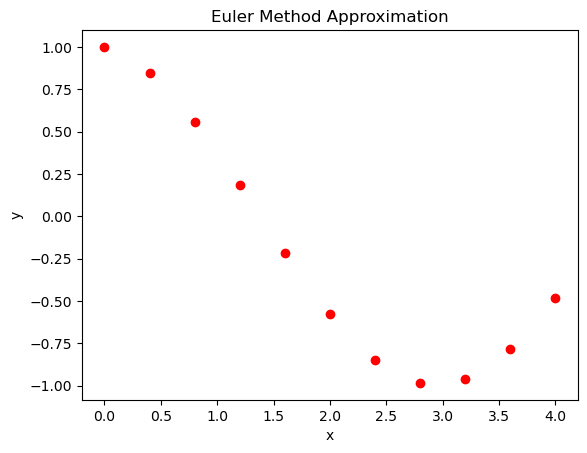

In [56]:
# extract the x and y coordinates from P
x = [p[0] for p in P]
y = [p[1] for p in P]

# plot the array of dots
plt.plot(x, y, 'ro')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Euler Method Approximation')
plt.show()

How do our generated points compare to the exact solution?

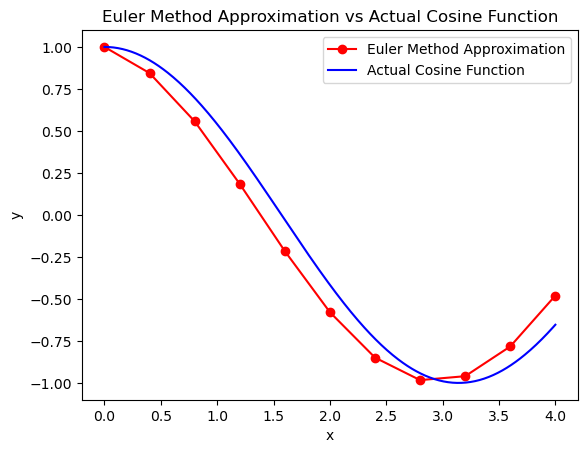

In [57]:
# create an array of x values
x_actual = np.linspace(0, 4, 400)

# compute the corresponding y values using the actual cosine function
y_actual = np.cos(x_actual)

# plot the Euler's method approximation and the actual cosine function on the same plot
plt.plot(x, y, 'ro-', label='Euler Method Approximation')
plt.plot(x_actual, y_actual, 'b-', label='Actual Cosine Function')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Euler Method Approximation vs Actual Cosine Function')
plt.legend()
plt.show()

As is immediately clear with the mere eye, even with only n=10 steps and a stepsize of h=0.4, the approximation is not far off. 
If we decrease the step size, we get a more correct solution. 

This comes with the trade-off that it obviously gets computationally more expensive for us to run. 

>Furthermore, there is a clear limit to what our computer is able to actually compute: We cannot simply decrease the stepsize infinitely, as the effects of rounding 
>errors become more pronounced. This is because computers represent real numbers using a finite number of bits, and therefore there is a limit to the precision that can be achieved. The infinity of all real numbers **cannot** possibly be represented by the finite memory of a computer, let alone a tiny slice of memory such as a single floating point variable, so many numbers stored are just approximations of the number they are meant to represent.

As we decrease the step size, we are essentially performing more calculations, and each calculation involves rounding the result to fit within the finite number of 
bits used by the computer. Over many calculations, these rounding errors can accumulate and result in a significant loss of accuracy.

Since there are only a limited number of values which are not an approximation, and any operation between an approximation and an another number results in an approximation, rounding errors are almost inevitable.

>Moreover, the Euler Method only *linearly* improves: If we take the new step size to be half of the current step size: h/2, the new solution is only double as accurate. 
There are better, more precise methods - 
such as the Heun Method or the Runge-Kutta Methods. These are gonna be the focus of next section. 

## 2. 2. Runge-Kutta Methods 
The Runge-Kutta methods are a family of numerical methods used to approximate the solution of ODEs. They are named after the German mathematicians Carl Runge and Martin Kutta, who first proposed this class of methods in the late 19th century.

The general idea behind the Runge-Kutta methods is to approximate the solution of an ODE by breaking it down into a series of smaller steps. At each step, the method computes an estimate of the solution based on information from the previous steps. This approach is already familiar to use from the Euler Method. However, the way the estimate is calculated differs. The estimate is then used to compute the next step, and so on, until the desired accuracy is reached.

The most commonly used Runge-Kutta method is the fourth-order Runge-Kutta method, also known as RK4. This method is particularly popular because it strikes a good balance between accuracy and computational efficiency.

__Why are there so many different versions of the individual methods?__

+ There are many different versions of the individual Runge-Kutta (RK) methods because they have been developed and refined over many years to address different problems and optimize performance.

## 2.2.1. RK1 Method

The RK1 method, also known as the forward Euler method, is a numerical method used to approximate the solutions of ordinary differential equations (ODEs). It is a first-order Runge-Kutta method, meaning that it is the simplest and least accurate of the Runge-Kutta methods.

Given an ODE $y' = f(x, y)$, where $y(x_0) = y_0$, the RK1 method approximates the solution $y(x)$ at a set of $n$ equally spaced points using the following steps:

1. Initialize the variables $x$ and $y$ to $x_0$ and $y_0$, respectively.

2. Create an empty list called result to store the approximated solutions.

3. Use a loop to iterate $n$ times, where $n$ is the number of points at which the solution is approximated.

4. Within the loop, compute the following intermediate value:

$$k = h \cdot f(x, y)$$  

>Here, $h$ is the step size, and $f(x, y)$ is the derivative function evaluated at the current values of $x$ and $y$.

6. Compute the new value of $y$ using the following formula:
$$y \gets y + k$$

7. Increease the value of $x$ by $h$.

8. Append the tuple $(x, y)$ to the result list.

9. Return the result list.


The RK1 method is the simplest of the Runge-Kutta methods and is only first-order accurate. It is therefore less accurate than the RK2 and RK3 methods, but it is also less computationally expensive. If this approach looks familiar to us, this is no coincidence: RK1 and Explicit Euler are the same method. 

>The Error of Runge-Kutta is better than EEM, if we half the step size in Runge-Kutta, the accuracy squares. 


Additionally, the Runge-Kutta method is more stable than the explicit Euler method, meaning that it can handle stiffer ODEs and larger step sizes without becoming numerically 

That, however, is only the basic Runge-Kutta Method, RK1. There is three more RK2, RK3, RK4. So what are they about? 

In [58]:
def rk1(f, x0, y0, h, n):
    x = x0
    y = y0
    result = [(x, y)]
    for i in range(n):
        y += h * f(x, y)
        x += h
        result.append((x, y))
    return result

## 2.2.2. The RK2 Method /Heun's Method
Given an ODE $y' = f(x, y)$, where $y(x_0) = y_0$, the RK2 method approximates the solution $y(x)$ at a set of $n$ equally spaced points using the following steps:

1. Initialize the variables $x$ and $y$ to $x_0$ and $y_0$, respectively.

2. Create an empty list called result to store the approximated solutions.

3. Use a loop to iterate $n$ times, where $n$ is the number of points at which the solution is approximated.

4. Within the loop, compute the following intermediate values:

$$k_1 = h \cdot f(x, y)$$
$$k_2 = h \cdot f(x + h/2, y + k_1/2)$$

>>Here, $h$ is the step size, and $f(x, y)$ is the derivative function evaluated at the current values of $x$ and $y$.

5. Compute the new value of $y$ using the following formula:
$$y \gets y + k_2$$

6. Increase the value of $x$ by $h$.

7. Append the tuple $(x, y)$ to the result list.

8. Return the result list.

The RK2 method is a good compromise between accuracy and computational efficiency, making it a popular choice for solving ODEs in many scientific and engineering applications where a moderate level of accuracy is sufficient.

In [51]:
def rk2(f, x0, y0, h, n):
    x = x0
    y = y0
    result = [(x, y)]
    for i in range(n):
        k1 = h * f(x, y)
        k2 = h * f(x + h, y + k1)
        y += (k1 + k2) / 2
        x += h
        result.append((x, y))
    return result

## 2.2.3. RK3 Method

The RK3 method is a third-order Runge-Kutta method, meaning that it is more accurate than the second-order Runge-Kutta method (RK2) but less accurate than the fourth-order Runge-Kutta method (RK4).

Given an ODE $y' = f(x, y)$, where $y(x_0) = y_0$, the RK3 method approximates the solution $y(x)$ at a set of $n$ equally spaced points using the following steps:

1. Initialize the variables $x$ and $y$ to $x_0$ and $y_0$, respectively.

2. Create an empty list called result to store the approximated solutions.

3. Use a loop to iterate $n$ times, where $n$ is the number of points at which the solution is approximated.

4. Within the loop, compute the following intermediate values:

$$k_1 = h \cdot f(x, y)$$
$$k_2 = h \cdot f(x + h, y + k_1)$$
$$k_3 = h \cdot f(x + h/2, y + k_1/2)$$
$$k_4 = h \cdot f(x + h/2, y + k_3/2)$$

> Here, $h$ is the step size, and $f(x, y)$ is the derivative function evaluated at the current values of $x$ and $y$.

6. Compute the new value of $y$ using the following formula:
$$y \gets y + \frac{k_1 + 2k_4 + 2k_3 + k_2}{6}$$

7. Increase the value of $x$ by $h$.

8. Append the tuple $(x, y)$ to the result list.

9. Return the result list.

In [60]:
def rk3(f, x0, y0, h, n):
    x = x0
    y = y0
    result = [(x, y)]
    for i in range(n):
        k1 = h * f(x, y)
        k2 = h * f(x + h/2, y + k1/2)
        k3 = h * f(x + h, y - k1 + 2*k2)
        y += (k1 + 4*k2 + k3) / 6
        x += h
        result.append((x, y))
    return result

## 2.2.4. RK4 Method 

Given an ODE $y' = f(x, y)$, where $y(x_0) = y_0$, the RK4 method approximates the solution $y(x)$ at a set of $n$ equally spaced points using the following steps:

1. Initialize the variables $x$ and $y$ to $x_0$ and $y_0$, respectively.

2. Create an empty list called result to store the approximated solutions.

3. Use a loop to iterate $n$ times, where $n$ is the number of points at which the solution is approximated.

4. Within the loop, compute the following intermediate values:

$$k_1 = h \cdot f(x, y)$$

$$k_2 = h \cdot f(x + h/2, y + k_1/2)$$

$$k_3 = h \cdot f(x + h/2, y + k_2/2)$$

$$k_4 = h \cdot f(x + h, y + k_3)$$


5. Compute the new value of $y$ using the following formula:
$$y \gets y + \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4)$$

6. Increase the value of $x$ by $h$.

7. Append the tuple $(x, y)$ to the result list.

8. Return the result list.

The RK4 method is the most accurate of the Runge-Kutta methods but also the most computationally expensive. It is therefore often used in situations where high accuracy is required and computational efficiency is not a major concern.

In [61]:
def rk4(f, x0, y0, h, n):
    x = x0
    y = y0
    result = [(x, y)]
    for i in range(n):
        k1 = h * f(x, y)
        k2 = h * f(x + h/2, y + k1/2)
        k3 = h * f(x + h/2, y + k2/2)
        k4 = h * f(x + h, y + k3)
        y += (k1 + 2*k2 + 2*k3 + k4) / 6
        x += h
        result.append((x, y))
    return result

## 2.2. Comparing the different RK-Methods
In the code cells that follow, we will try out the different RK methods on a simple example and see how they differ in performance. 

In [62]:
A = euler(lambda x,y: -sin(x), 0, 1, 0.4, 10)
B = rk1(lambda x,y: -sin(x), 0, 1, 0.4, 10)
C = rk2(lambda x,y: -sin(x), 0, 1, 0.4, 10)
D = rk3(lambda x,y: -sin(x), 0, 1, 0.4, 10)
E = rk4(lambda x,y: -sin(x), 0, 1, 0.4, 10)

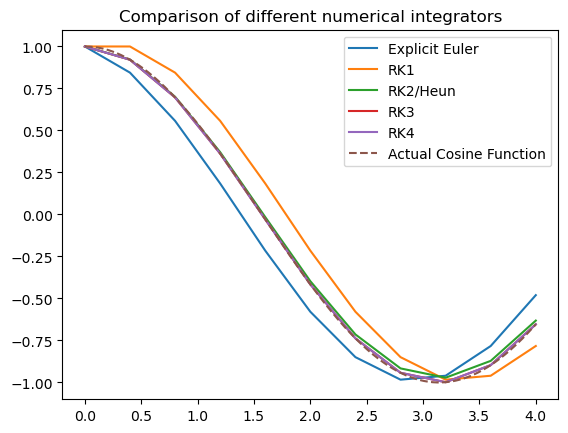

In [63]:
# extract the x and y coordinates from A,B,C,D,E
x1 = [a[0] for a in A]
y1 = [a[1] for a in A]
x2 = [b[0] for b in B]
y2 = [b[1] for b in B]
x3 = [c[0] for c in C]
y3 = [c[1] for c in C]
x4 = [d[0] for d in D]
y4 = [d[1] for d in D]
x5 = [e1[0] for e1 in E]
y5 = [e1[1] for e1 in E]

plt.plot(x1, y1, label='Explicit Euler')
plt.plot(x2, y2, label='RK1')
plt.plot(x3, y3, label='RK2/Heun')
plt.plot(x4, y4, label='RK3')
plt.plot(x5, y5, label='RK4')
plt.plot(x_actual, y_actual, '--', label='Actual Cosine Function')
plt.title('Comparison of different numerical integrators')
plt.legend()
plt.show()



As we can see, the differences in accuracy between the different numerical integration methods can be seen quite clearly. 

Feel free to try out different functions of which you know the analytical solution and see what the results is. 

## 2.3 A note on stepsize 

There are many more ways of using RK-Methods: They describe a family of methods. One for example, is about varying step size. The RK Method gives us the numerical solution to a differential equation by taking small steps in time. If our step size is too large, we might miss important features of the solution and shoot of too far in one direction. 
>let's consider an example to illustrate how choosing a step size that is too large can cause the numerical method to skip over important features.
>Suppose we want to numerically integrate the function f(x) = sin(x) from x = 0 to x = π/2. We can use the trapezoidal rule to approximate the integral:

__∫(0 to π/2) sin(x) dx ≈ (π/4) [sin(0) + 2sin(π/4) + sin(π/2)]__

>Now, let's consider what happens if we choose a step size that is too large. For instance, if we choose a step size of h = π/2, we only evaluate the function at two points: x = 0 and x = π/2. The trapezoidal rule >then approximates the integral as:

__∫(0 to π/2) sin(x) dx ≈ (π/2) [sin(0) + sin(π/2)] = π/2__

>However, we know that the exact value of the integral is 1, not π/2. This is because the function sin(x) varies rapidly over the interval [0, π/2], and evaluating it only at the endpoints misses important features of the function.
>By choosing a step size that is too large, we effectively "skip over" the oscillations of the function and underestimate the area under the curve. To obtain a more accurate approximation, we need to choose a smaller step size that captures the behavior of the function more accurately.
>in other words. 

In other words, the solution might become too granular and even "miss ups and downs". On the other hand, if our step size is smaller than necessary, we might be spending too much computational power on a uneventful section of the solution. This is where an __adaptive step size__ is useful, which is __the additional feature of the RK2 Method__. To adapt our step size, we first check to see if taking a step of half the size would result in a significant difference, as it would in our example above. If it does, we cut the step size in half and start to solve in smaller timesteps. If it does not, we check if taking a step of twice the size would result in a significant difference. If it does not, we start to move along the solution more quickly. 
In the code displayed below, the solution is calculated with the current step size, half step size and double step size. 



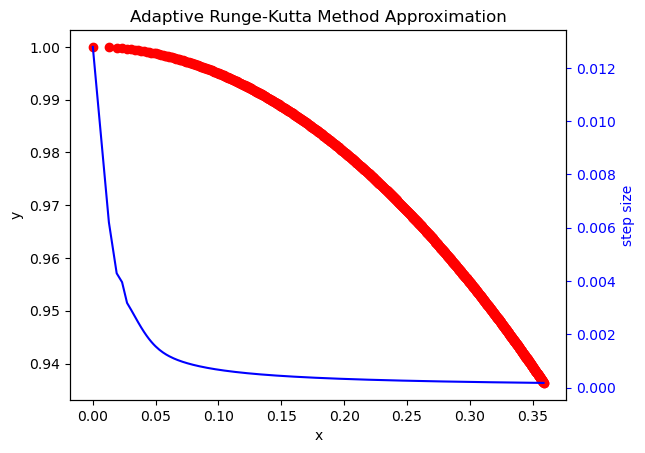

In [64]:
import matplotlib.pyplot as plt
import numpy as np

def rk_adaptive(f, x0, y0, h, tol, maxiter):
    x = x0
    y = y0
    result = [(x, y)]
    for i in range(maxiter):
        # Calculate k1, k2, k3, and k4
        k1 = h * f(x, y)
        k2 = h * f(x + h/2, y + k1/2)
        k3 = h * f(x + h/2, y + k2/2)
        k4 = h * f(x + h, y + k3)
        # Calculate y_n+1 using the Runge-Kutta formula
        y_new = y + (k1 + 2*k2 + 2*k3 + k4) / 6
        # Estimate the error
        err = np.abs((y_new - y) / y_new)
        # Update the step size based on the error
        if err <= tol:
            # Accept the step
            y = y_new
            x += h
            result.append((x, y))
        # Update the step size and retry
        h = 0.9 * h * (tol/err)**0.25
    return result

# Define the differential equation and the initial conditions
def f(x, y):
    return -np.sin(x)

x0, y0 = 0, 1
h, tol, maxiter = 0.4, 1e-4, 1000

# Run the adaptive Runge-Kutta method
result = rk_adaptive(f, x0, y0, h, tol, maxiter)

# Extract the x and y coordinates from the result
x = [p[0] for p in result]
y = [p[1] for p in result]

# Plot the approximation and the step size jumps
fig, ax1 = plt.subplots()
ax1.plot(x, y, 'ro')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Adaptive Runge-Kutta Method Approximation')

# Create a second y-axis for the step size
ax2 = ax1.twinx()
ax2.plot(x[:-1], np.diff(x), 'b')
ax2.set_ylabel('step size', color='b')
ax2.tick_params('y', colors='b')

plt.show()

## 2.4 Dormand-Prince Method

Also called Dop or DOPRI, it was developed by Dormand and Prince in 1980 and belongs to the Runge-Kutta Family of ODE solvers. 
In the 4th Order RK Method, the slope was sampled four times, at four different points. We then took a weighted average of the slopes to estimate the solution at the next time step
t+1. The Dormand Prince Method more or less does the same thing, except more often: 7 times in total: 

\begin{equation*}
    \begin{aligned}
        k_{1} &=h f\left(t_{k}, y_{k}\right), \\
        k_{2} &=h f\left(t_{k}+\frac{1}{5} h, y_{k}+\frac{1}{5} k_{1}\right), \\
        k_{3} &=h f\left(t_{k}+\frac{3}{10} h, y_{k}+\frac{3}{40} k_{1}+\frac{9}{40} k_{2}\right), \\
        k_{4} &=h f\left(t_{k}+\frac{4}{5} h, y_{k}+\frac{44}{45} k_{1}-\frac{56}{15} k_{2}+\frac{32}{9} k_{3}\right), \\
        k_{5} &=h f\left(t_{k}+\frac{8}{9} h, y_{k}+\frac{19372}{6561} k_{1}-\frac{25360}{2187} k_{2}+\frac{64448}{6561} k_{3}-\frac{212}{729} k_{4}\right), \\
        k_{6} &=h f\left(t_{k}+h, y_{k}+\frac{9017}{3168} k_{1}-\frac{355}{33} k_{2}-\frac{46732}{5247} k_{3}+\frac{49}{176} k_{4}-\frac{5103}{18656} k_{5}\right), \\
        k_{7} &=h f\left(t_{k}+h, y_{k}+\frac{35}{384} k_{1}+\frac{500}{1113} k_{3}+\frac{125}{192} k_{4}-\frac{2187}{6784} k_{5}+\frac{11}{84} k_{6}\right).
    \end{aligned}
\end{equation*}


At every step we take weighted averages of the previous calculation $k$ to calculate the next calculation $k+1$. Then the next step value $y_{k+1}$ is calculated as
\begin{equation*}
y_{k+1}=y_{k}+\frac{35}{384} k_{1}+\frac{500}{1113} k_{3}+\frac{125}{192} k_{4}-\frac{2187}{6784} k_{5}+\frac{11}{84} k_{6}.
\end{equation*}

This is a calculation by Runge-Kutta method of order 4. We have to be aware that we do not use $k_2$, though it is used to calculate $k_3$ and so on.

Next, we will calculate the next step value $z_{k+1}$ by Runge-Kutta method of order 5 as

\begin{equation*}
z_{k+1}=y_{k}+\frac{5179}{57600} k_{1}+\frac{7571}{16695} k_{3}+\frac{393}{640} k_{4}-\frac{92097}{339200} k_{5}+\frac{187}{2100} k_{6}+\frac{1}{40} k_{7}.
\end{equation*}



We calculate the difference of the two next values |𝑧𝑘+1−𝑦𝑘+1|.

\begin{equation*}
\left|z_{k+1}-y_{k+1}\right|=\left|\frac{71}{57600} k_{1}-\frac{71}{16695} k_{3}+\frac{71}{1920} k_{4}-\frac{17253}{339200} k_{5}+\frac{22}{525} k_{6}-\frac{1}{40} k_{7}\right|
\end{equation*}

This is considered as the error in 𝑦𝑘+1. We calculate the optimal time interval ℎ𝑜𝑝𝑡 as,
\begin{equation*}
    s =\left(\frac{\varepsilon h}{2\left|z_{k+1}-y_{k+1}\right|}\right)^{\frac{1}{5}}, \\
    h_{o p t} =s h,
\end{equation*}



where ℎ in the right side is the old time interval. 
__To summarize:__
1. Calculate k1, k2, k3, k4, k5, k6, and k7 using the given equations.

2. Calculate yk+1 using the weighted average of k1 to k6 and the given equation.

3. Calculate zk+1 using the weighted average of k1 to k7 and the given equation.

4. Calculate the error in yk+1 using the difference between zk+1 and yk+1.

5. Calculate the optimal time interval hopt using the given equation, where ε is the desired error tolerance and h is the old time interval.

6. If the error in yk+1 is within the desired tolerance, then accept yk+1 and set h = hopt for the next step. If the error is too large, then reject yk+1 and set h = hopt for the current step. Repeat the process for the next step.

>>In terms of execution, this means: 

+ The method computes two different approximations to the solution at each step, y1 and y2, using two different sets of coefficients (b1, b3, ..., b6 and d1, d3, ..., d6). The difference between these two approximations is used to estimate the error of the method. If the error is smaller than a specified tolerance (tol), the method accepts the step and advances to the next step with the new value of y.

+ If the error is larger than the tolerance, the method reduces the step size (h) and repeats the step with the new step size. The method uses an adaptive step-size control algorithm to adjust the step size based on the error estimate and the tolerance. The step size is reduced if the error is too large, and increased if the error is small enough.

+ The method also includes some safeguards to prevent the step size from becoming too small or too large, which could cause numerical instabilities or slow convergence.

+ The code returns a list of tuples, where each tuple represents the value of x and y at each step of the method. The method terminates when x reaches the maximum value (xmax) or when the step size becomes too small (hmin). If the step size becomes too small, the method raises a ValueError to indicate that the solution cannot be computed with the specified tolerance.

Furter below, pseudocode is provided. 


In [65]:
def dp5(f, x0, y0, h, xmax, tol):
    a2 = 1/5
    a3 = 3/10
    a4 = 4/5
    a5 = 8/9
    a6 = 1
    b1 = 35/384
    b3 = 500/1113
    b4 = 125/192
    b5 = -2187/6784
    b6 = 11/84
    c2 = 1/5
    c3 = 3/10
    c4 = 4/5
    c5 = 8/9
    c6 = 1
    d1 = 5179/57600
    d3 = 7571/16695
    d4 = 393/640
    d5 = -92097/339200
    d6 = 187/2100
    x = x0
    y = y0
    hmin = 0.0001 * h
    result = [(x, y)]
    
    while x < xmax:
        if x + h > xmax:
            h = xmax - x
        k1 = h * f(x, y)
        k2 = h * f(x + c2 * h, y + a2 * k1)
        k3 = h * f(x + c3 * h, y + a3 * k1 + a3 * k2)
        k4 = h * f(x + c4 * h, y + a4 * k1 - a4 * k2 + a4 * k3)
        k5 = h * f(x + c5 * h, y + a5 * k1 + a5 * k2 - a5 * k3 + a5 * k4)
        k6 = h * f(x + c6 * h, y + a6 * k1 - a6 * k2 + a6 * k3 - a6 * k4 + a6 * k5)
        y1 = y + b1 * k1 + b3 * k3 + b4 * k4 + b5 * k5 + b6 * k6
        y2 = y + d1 * k1 + d3 * k3 + d4 * k4 + d5 * k5 + d6 * k6
        delta = abs(y1 - y2)
        if delta < tol:
            x += h
            y = y1
            result.append((x, y))
        h = h * min(5, 0.9 * (tol / delta) ** 0.2)
        if h < hmin:
            raise ValueError('Step size too small')
    return result


In the example code below, an ODE f(x, y) = xy  with an analytic solution y(x) = e^(0.5x^2) is defined. It then uses the dp5 function to solve the ODE numerically, with a step size of 0.1 and a tolerance of 1e-6. 

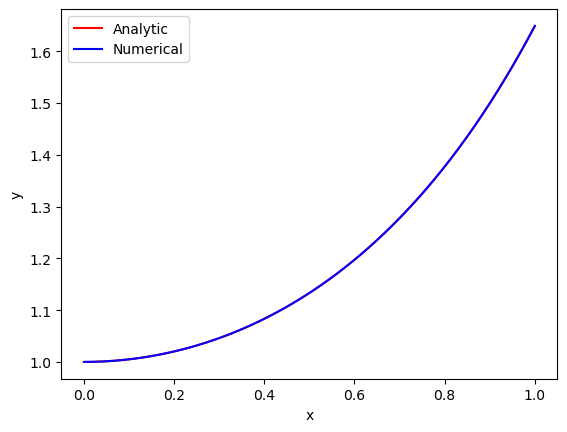

In [66]:
def f(x, y):
    return x * y  # example ODE

def analytic(x):
    return np.exp(0.5 * x**2)  # analytic solution for y(x)

x0, y0 = 0, 1  # initial condition
h = 0.1  # step size
xmax = 1  # upper bound of x
tol = 1e-6  # tolerance for dp5

# Solve the ODE using dp5
result = dp5(f, x0, y0, h, xmax, tol)
xs = [x for x, y in result]
ys = [y for x, y in result]

# Compute the analytic solution
x_analytic = np.linspace(x0, xmax, 100)
y_analytic = analytic(x_analytic)

# Plot the solutions
plt.plot(x_analytic, y_analytic, 'r-', label='Analytic')
plt.plot(xs, ys, 'b-', label='Numerical')
plt.legend(loc='upper left')
plt.xlabel('x')
plt.ylabel('y')
plt.show()



You might think that it has accidentally not plotted both. This is not true. 
Convince yourself by # out either plt.plot(x_analytic, y_analytic, 'r-', label='Analytic') or plt.plot(xs, ys, 'b-', label='Numerical') to see how accurate the solution is. 

## 3. Stochastic Integrators

So far, we have only spoken about deterministic integrators. What are "stochastic" integrators opposed to "determinstic integrators?

Stochastic integrators are used to approximate the solution of stochastic differential equastions (SDEs). In contrast to deterministic integrators, which are used to approximate solutions of ODEs, stochastic integrators take into account the randomness of stochasticity of the underlying process. 

SDEs describe the evolution of systems that have __both deterministic and random__ components. 
In the context of whole brain dynamics, SDEs are used to model the dynamics of large-scale brain networks, where the activity of each brain region is modeled as a stochastic process. 
In summary, deterministic integrators simulate neural activity using fixed mathematical formulas, while stochastic integrators introduce random noise to simulate the effects of real-world noise sources. Both methods have their strengths and limitations, and the choice of integrator depends on the specific research question and the level of realism required in the simulation.


Stochastic integrators work by simulating the random fluctuations in the system using a random number generator. 
Deterministic integrators, on the other hand, are numerical methods used to approximate the solution of ODEs. ODEs describe the evolution of deterministic systems, where the outcome is fully determined by the initial conditions and the governing equations. Examples of deterministic systems include the motion of a pendulum or the growth of a population of organisms.

In other words, _SDE = ODE + Gaussian White Noise (GWN)_

To be more precise, 
\begin{equation*}
\frac{dx}{dt} = f(x) + \xi_{t+dt}
\end{equation*}
where  $\xi_{t+dt}$ denotes Gaussian White Noise. Gaussian noise means the probability density function of the noise has a Gaussian distribution, which basically defines the probability of the signal having a certain value. Whereas white noise simply means that the signal power is distributed equally over time.

$\xi_{t+dt}$ can vary in intensity, which is often denoted by an additional term $g(x)$:
\begin{equation*}
\frac{dx}{dt} = f(x) + g(x)* \xi_{t+dt}
\end{equation*}




It should be mentioned that different kinds of noise are used for different reasons, such as implementability, context, biological feasability etc... 




In the next section, we are going to cover the stochastic Heun method and the stochastic Euler method. You will see that they work by the same principle. If you want to see, for example, the stochastic DoPRi or RK4 Method, you should by the end of this section be able to implement such a method yourself. 

### Stochastic Euler Method

## 3.1. Stochastic Euler Method

__The steps of the Stochastic Euler method can be summarized as follows:__

1. Given the current time and value of the solution, estimate the value of the solution at the end of the time interval using the deterministic drift term of the SDE evaluated at the current time step.

2. Add a random term to the estimate that accounts for the stochasticity of the system. This random term is drawn from a normal distribution with mean 0 and variance equal to the diffusion coefficient of the SDE evaluated at the current time step.

3. Use the updated estimate as the value of the solution at the end of the time interval and repeat the process for the next time step.

__In the code below, the function stochastic_euler takes five arguments:__

+ f: a function that computes the deterministic drift term of the SDE
+ g: a function that computes the diffusion coefficient of the SDE
+ x0: the initial time
+ y0: the initial value of the solution
+ h: the time step size
+ n: the number of time steps

The code implements the Stochastic Euler method by adding a random term to the update of y at each time step. The random term is computed using np.sqrt(h) * g(x,y) * np.random.normal(), where np.random.normal() provides random values from a normal (Gaussian) distribution. 
But what exactly does that mean? The factor 'np.sqrt(h) is used to make sure that the random component has the appropriate scaling for the time step 'h'. For neural mass models, the appropriate scaling factor for the random component will depend on the specific model being simulated and the nature of the noise in the system. In general, it is best to consult the literature on the specific model being used to determine the appropriate scaling factor. However, a common approach is to use the same scaling factor as for Brownian motion (i.e., np.sqrt(h)) if the noise is assumed to be Gaussian white noise. The function g(x, y) is a function that specifies the strength of the noise at each point (x,y) in the phase space. Multiplying the random number by g(x,y) ensures that the noise amplitude is scaled based on the value of g(x,y) at each point.

>So overall, this line of code generates a random perturbation to the deterministic evolution of the system, with a strength that is scaled by both the time step h and the function g(x,y) that specifies the strength of the noise at each point. 



In [64]:
np.random.seed(9234)

def stochastic_euler(f, g, x0, y0, h, n):
    x = x0
    y = y0
    result = [(x,y)]
    for i in range(n):
        x = x + h
        y = y + h * f(x,y) + np.sqrt(h) * g(x,y) * np.random.normal()
        result.append((x,y))
    return result


Next, let us look at an example of such an implementation. I would suggest to run the following cell for at least 5 to 10 times so you can see how strongly the results vary because of the introduction of noise.

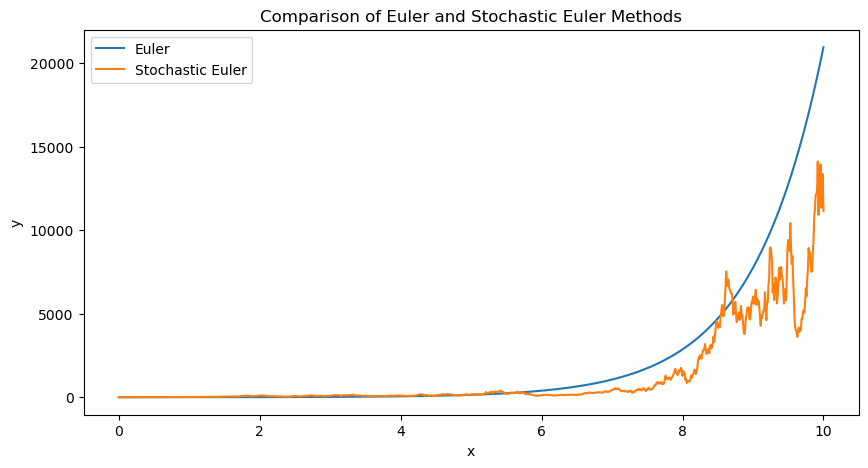

In [65]:
# Define the differential equations
def f(x, y):
    return y

def g(x, y):
    return y - x
    #return x**2 + y**2

# Set the initial conditions and parameters
x0 = 0
y0 = 1
h = 0.01
n = 1000

# Generate the trajectories using the euler and stochastic_euler functions
euler_traj = euler(f, x0, y0, h, n)
stoch_euler_traj = stochastic_euler(f, g, x0, y0, h, n)

# Create a plot comparing the two trajectories
plt.figure(figsize=(10,5))
plt.plot([x for x,y in euler_traj], [y for x,y in euler_traj], label='Euler')
plt.plot([x for x,y in stoch_euler_traj], [y for x,y in stoch_euler_traj], label='Stochastic Euler')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison of Euler and Stochastic Euler Methods')
plt.show()



Other numerical integrators can be turned into a stochastical integrator with the same method of steps. If you want to check your understanding of the process, you could try building one yourself by adjusting one of the integrators featured already. 

## 4. Coupled ODEs

+ A system of coupled ODEs is a set of two or more ordinary differential equations that are interconnected and dependent on each other. These equations are typically used to model the behavior of complex physical systems in which the variables are not independent, but instead are coupled and interact with each other.
+ This means that the equations cannot be solved independently of each other. 
+ This sounds quite abstract, but it is simply because the individual components of a coupled ODEs system influence each other, which we model as the exchange of information - numbers. 
>In the case of TVB, coupled ODEs systems is an integral part of the software and theory TVB could not work without. So far, when working with TVB, we have simply encountered them under a different name: Neural Mass Models, NMM for short. 
>A number of different NMMs have been implemented in TVB for a number of different reasons, as they all have their pros and cons, such as the Generic 2D Oscillator Model, the Epileptor Model or the Jansen-Rit Model. In the following paragraphs, the focus will be on the Jansen-Rit Model. However, by the end of this section, you should be able to model and try out a different NMM. 

## 4.1. Neural Mass Model: The Jansen-Rit Model

As an introduction, the TVB Documentation website says it best: "The Jansen and Rit is a biologically inspired mathematical framework originally conceived to simulate the spontaneous electrical activity of
neuronal assemblies, with a particular focus on alpha activity, for instance, as measured by EEG. Later on, it was discovered that in addition to alpha activity, this model was also able to simulate evoked potentials." The following equations are from: "Jansen, B., H. and Rit V., G., *Electroencephalogram and
        visual evoked potential generation in a mathematical model of
        coupled cortical columns*, Biological Cybernetics (73) 357:366, 1995.": 



\begin{align*}
\dot{y_0} &= y_3 \\
\dot{y_3} &= Aa,S[y_1 - y_2] - 2ay_3 - a^2y_0 \\
\dot{y_1} &= y_4 \\
\dot{y_4} &= Aa,[p(t) + \alpha_2J + S[\alpha_1Jy_0]+ c_0] -2ay_4 - a^2y_1 \\
\dot{y_2} &= y_5 \\
\dot{y_5} &= Bb(\alpha_4JS[\alpha_3Jy_0]) - 2by_5 - b^2y_2 \\
S[v] &= \frac{2\nu_{max}}{1 + \exp^{r(v_0 - v)}}
\end{align*}

The Jansen-Rit model is a neural population model of a local cortical circuit. It contains three interconnected neural populations: one for the pyramidal projection neurons and two for excitatory and inhibitory interneurons forming feedback loops.

Let us not get intimidated by this huge gathering of letters. We will work through this step by step. 
To start with, let's untangle the notation: Every single letter, except for the _y's_ and S[] (which is the next-potential to rate function), is a parameter: a fixed number that can be varied between different simulation runs. Often with the aim to make the output more biologically "realistic". 


These constants have to be specified before the code is run and can lie in a an acceptable interval, for example for __A__ (Maximum amplitude of EPSP [mV]. Also called average synaptic gain) between [2.6, 9.75] with a default value of A=3.6. 

However, Neural Mass Models do not always have to biologically respond to something in the neurological architecture. In other words, sometimes they do not try to mimic or simplifly real world brain activity on a small scale, but rather are written in a way to produce output that is desired.

## Step by Step Calculation of a coupled ODE

__ I would here like to add that due to time constraints I have not managed to make the JR Model oscillate. Perhaps you will be able to with the right set of variables.__ 



__A coupled ODE is numerically solved by basically solving the state variables at every timestep one after the other, using the estimates from the previous timestep (or if just starting, the intial conditions) to calculate their current values. Thus, it differs from a single ODE to the extend that at every time step not one state variable is calculated but many.__


The state variables in the JR model are denoted by $y_0$, $y_1$, $y_2$, $y_3$, $y_4$, and $y_5$, and represent the activity levels of different neuronal subpopulations within the NMM. The parameters in the model are denoted by $A$, $B$, $a$, $b$, $c_0$, $\alpha_1$, $\alpha_2$, $\alpha_3$, and $\alpha_4$, and represent various properties of the neuronal populations and their interactions.

$y_0, y_1$ and $y_3$ are the outputs of the average postsynaptic membrane potential (PSP) blocks. $y_2$ represents the average inhibitory postsynaptic potential in the pyramidal cell population, while $y_4$ and $y_5$ describe the dynamics of the average excitatory and inhibitory postsynaptic potentials, respectively.

The function takes the following inputs:

+ x: The current time point.
+ y: A 1D NumPy array or list containing the current state of the variables [y0, y1, y2, y3, y4, y5].
+ A, a, B, b, alpha, J, nu_max, r, v0, p, c0: Parameters and functions that define the Jansen-Ritt Neural Mass Model.
+ The function computes the derivatives of the state variables using the given input parameters and the equations provided for the Jansen-Ritt Neural Mass Model.

+ The np.array that is returned by the function contains the values of the derivatives for the state variables [y0, y1, y2, y3, y4, y5] in the same order. The shape of the returned array is (6,) which means it is a 1D NumPy array with 6 elements.

__Here is a breakdown of the function:__

1. Unpack the input state variables y into individual variables: y0, y1, y2, y3, y4, y5.
2. Compute the derivatives of each state variable using the provided equations
3. Return the computed derivatives as a 1D NumPy array with the shape (6,), containing the values of the derivatives for the state variables [y0, y1, y2, y3, y4, y5] in the same order.

The function is designed to be used with numerical integration methods, such as the RK4 method, to simulate the time evolution of the Jansen-Ritt Neural Mass Model. The numerical integrator takes this function as input and computes the next state of the system based on the derivatives returned by the function.


In [422]:
def S(v, nu_max, r, v0):
    return (2 * nu_max) / (1 + np.exp(r * (v0 - v)))

# Define the  p function, pulse function, can be any arbitrary function including white noise
def p(x):
    return np.sin(x)

def jansen_ritt_system(x, y, A, a, B, b, alpha, J, nu_max, r, v0, p, c0):
    y0, y1, y2, y3, y4, y5 = y

    dy0_dt = y3
    dy1_dt = y4
    dy2_dt = y5
    dy3_dt = A * a * S(y1 - y2, nu_max, r, v0) - 2 * a * y3 - a**2 * y0
    dy4_dt = A * a * (p(x) + alpha[1] * J + S(alpha[0] * J * y0, nu_max, r, v0) + c0) - 2 * a * y4 - a**2 * y1
    dy5_dt = B * b * (alpha[3] * J * S(alpha[2] * J * y0, nu_max, r, v0)) - 2 * b * y5 - b**2 * y2

    return np.array([dy0_dt, dy1_dt, dy2_dt, dy3_dt, dy4_dt, dy5_dt])

Next, we use the already known to us RK4 Method:

In [423]:
def rk4_system(f, x0, y0, h, n):
    x = x0
    y = y0
    result = [(x, y.copy())]
    for i in range(n):
        k1 = h * f(x, y)
        k2 = h * f(x + h/2, y + k1/2)
        k3 = h * f(x + h/2, y + k2/2)
        k4 = h * f(x + h, y + k3)
        y += (k1 + 2*k2 + 2*k3 + k4) / 6
        x += h
        result.append((x, y.copy()))
    return result

Furthermore, a we have to set the parameters: 

In [424]:
# Set the model parameters
A = 2.25
a = 0.1
B = 22
b = 0.05
alpha = [1.0, 0.8, 0.25, 0.25]
J = 135
nu_max = 0.0025
r = 0.56
v0 = 5.52
c0 = 10

# Set the initial conditions 
x0 = 0

Next, we have to set the intial conditions: 

In [425]:
np.random.seed(238644)
x0 = 0
y0 = np.random.rand(6)
h = 0.01 # step size
n = 10000 # number of steps

Finally, we have to calculate the values for all the coupled differential equations: 

In [426]:
results = rk4_system(lambda x, y: jansen_ritt_system(x, y, A, a, B, b, alpha, J, nu_max, r, v0, p, c0), x0, y0, h, n)


Now that you have the results from the numerical integration, you can extract the time series data for each state variable as follows:

In [427]:
time = np.array([t for t, _ in results])
variables = np.array([y for _, y in results])

y0_vals = variables[:, 0]
y1_vals = variables[:, 1]
y2_vals = variables[:, 2]
y3_vals = variables[:, 3]
y4_vals = variables[:, 4]
y5_vals = variables[:, 5]

and plot the result: 

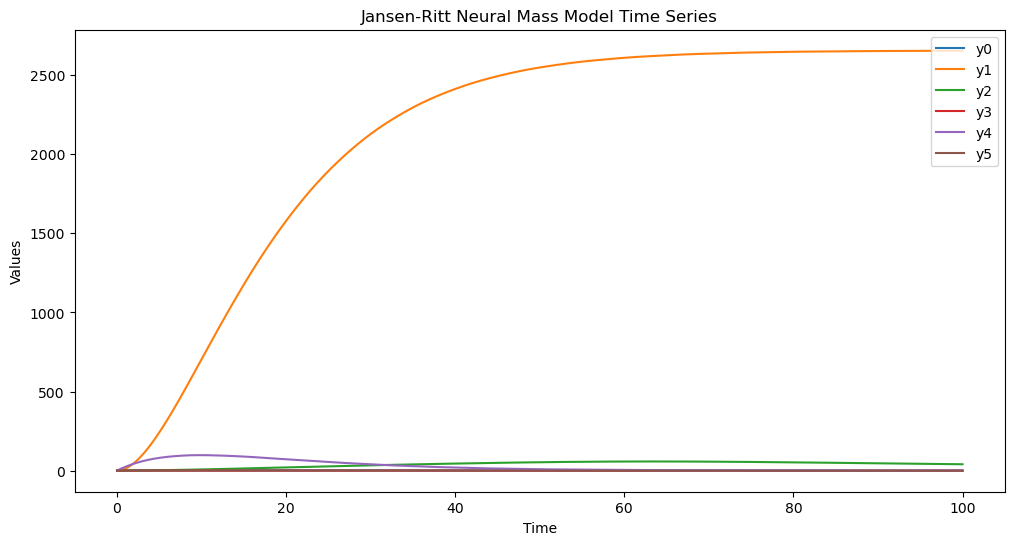

In [428]:
plt.figure(figsize=(12, 6))

plt.plot(time, y0_vals, label='y0')
plt.plot(time, y1_vals, label='y1')
plt.plot(time, y2_vals, label='y2')
plt.plot(time, y3_vals, label='y3')
plt.plot(time, y4_vals, label='y4')
plt.plot(time, y5_vals, label='y5')

plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Jansen-Ritt Neural Mass Model Time Series')
plt.legend(loc='upper right')
# Set the y-axis limits
#plt.ylim(-25, 50)

plt.show()


Next, we can visualize the phase plane for two different state variables: 

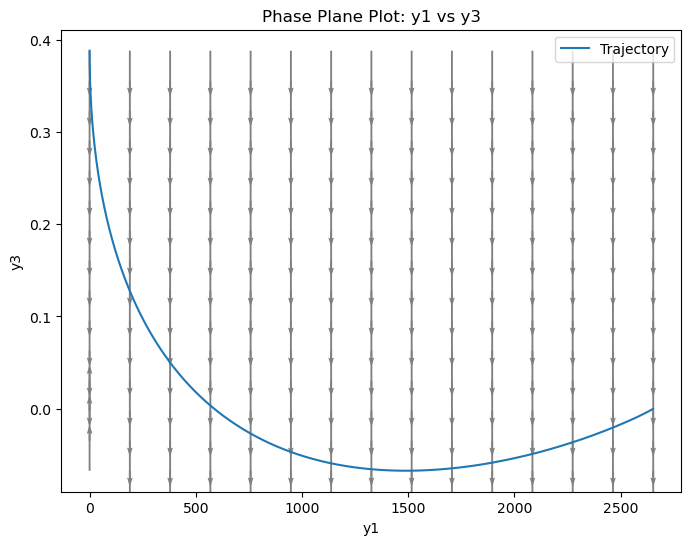

In [430]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the grid for the quiver plot
y1_range = np.linspace(y1_vals.min(), y1_vals.max(), 15)
y3_range = np.linspace(y3_vals.min(), y3_vals.max(), 15)
y1_grid, y3_grid = np.meshgrid(y1_range, y3_range)

# Compute the derivatives at the grid points
y_grid = np.array([y1_grid, np.zeros_like(y1_grid), np.zeros_like(y1_grid), y3_grid, np.zeros_like(y1_grid), np.zeros_like(y1_grid)])
dy_dt_grid = jansen_ritt_system(0, y_grid, A, a, B, b, alpha, J, nu_max, r, v0, p, c0)

# Extract the y1 and y3 derivatives
dy1_dt_grid = dy_dt_grid[1]
dy3_dt_grid = dy_dt_grid[3]

# Normalize the arrows (optional)
magnitude = np.sqrt(dy1_dt_grid**2 + dy3_dt_grid**2)
dy1_dt_grid /= magnitude
dy3_dt_grid /= magnitude

# Create the phase plane plot
plt.figure(figsize=(8, 6))
plt.plot(y1_vals, y3_vals, label='Trajectory')
plt.quiver(y1_grid, y3_grid, dy1_dt_grid, dy3_dt_grid, color='gray', angles='xy', scale_units='xy', scale=20, width=0.003)
plt.xlabel('y1')
plt.ylabel('y3')
plt.title('Phase Plane Plot: y1 vs y3')
plt.legend(loc='upper right')
plt.show()

and even three different state variables of our choice! 

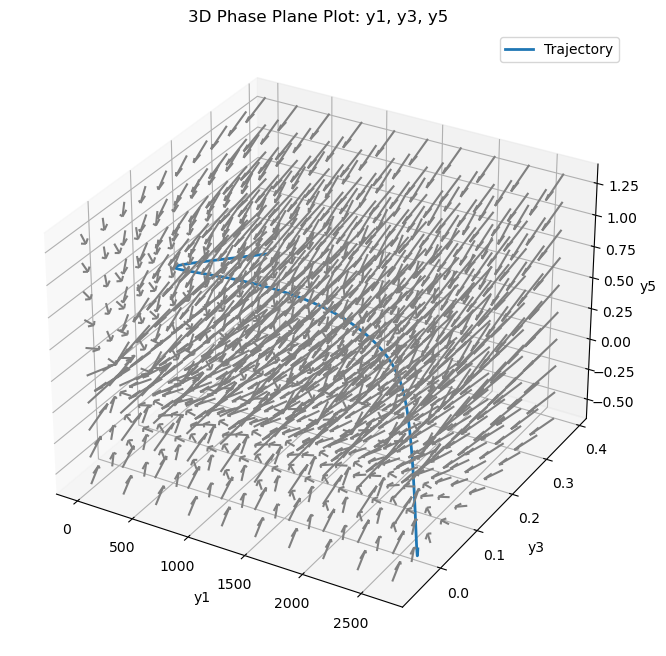

In [431]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Compute the grid for the quiver plot
y1_range = np.linspace(y1_vals.min(), y1_vals.max(), 10)
y3_range = np.linspace(y3_vals.min(), y3_vals.max(), 10)
y5_range = np.linspace(y5_vals.min(), y5_vals.max(), 10)
y1_grid, y3_grid, y5_grid = np.meshgrid(y1_range, y3_range, y5_range)

# Compute the derivatives at the grid points
y_grid = np.array([np.zeros_like(y1_grid), y1_grid, np.zeros_like(y1_grid), y3_grid, np.zeros_like(y1_grid), y5_grid])
dy_dt_grid = jansen_ritt_system(0, y_grid, A, a, B, b, alpha, J, nu_max, r, v0, p, c0)

# Extract the y1, y3, and y5 derivatives
dy1_dt_grid = dy_dt_grid[1]
dy3_dt_grid = dy_dt_grid[3]
dy5_dt_grid = dy_dt_grid[5]

# Normalize the arrows (optional)
magnitude = np.sqrt(dy1_dt_grid**2 + dy3_dt_grid**2 + dy5_dt_grid**2)
dy1_dt_grid /= magnitude
dy3_dt_grid /= magnitude
dy5_dt_grid /= magnitude

# Create the 3D phase plane plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot(y1_vals, y3_vals, y5_vals, lw=2, label='Trajectory')
ax.quiver(y1_grid, y3_grid, y5_grid, dy1_dt_grid, dy3_dt_grid, dy5_dt_grid, color='gray', length=0.1, normalize=True)

ax.set_xlabel('y1')
ax.set_ylabel('y3')
ax.set_zlabel('y5')
ax.set_title('3D Phase Plane Plot: y1, y3, y5')
ax.legend(loc='upper right')

plt.show()

This is as far as we can go in terms of visualisation, however, as we are still human beings limited by a three-dimensional perception of space. 
>It is very useful to visualize the activitity of our model, as we as human beings can process visual information quite well. It can offer us a great opportunity to gain some intuition about how our model works. 

## 4.2. Stochastic Neural Mass Model

A stochastic NMM follows the same logic as the model we have seen above already, with the difference that noise is added. Here, we introduce the noise at the third state variable. Where it is added depends on the larger context and details of the model. 

In [471]:
# Define the noise standard deviation
noise_std_dev = 60

def jansen_ritt_system_stochastic(x, y, A, a, B, b, alpha, J, nu_max, r, v0, p, c0, noise_std_dev):
    y0, y1, y2, y3, y4, y5 = y

    dy0_dt = y3
    dy1_dt = y4
    dy2_dt = y5
    dy3_dt = A * a * S(y1 - y2, nu_max, r, v0) - 2 * a * y3 - a**2 * y0 + np.random.normal(0, noise_std_dev)
    dy4_dt = A * a * (p(x) + alpha[1] * J + S(alpha[0] * J * y0, nu_max, r, v0) + c0) - 2 * a * y4 - a**2 * y1 + np.random.normal(0, noise_std_dev)
    dy5_dt = B * b * (alpha[3] * J * S(alpha[2] * J * y0, nu_max, r, v0)) - 2 * b * y5 - b**2 * y2 + np.random.normal(0, noise_std_dev)

    return np.array([dy0_dt, dy1_dt, dy2_dt, dy3_dt, dy4_dt, dy5_dt])


In [472]:
results = rk4_system(lambda x, y: jansen_ritt_system_stochastic(x, y, A, a, B, b, alpha, J, nu_max, r, v0, p, c0, noise_std_dev), x0, y0, h, n)

/var/folders/mp/c2phtj9x1vl00p9kfx9w33_h0000gn/T/ipykernel_66416/3976481451.py:2: RuntimeWarning: overflow encountered in exp
  return (2 * nu_max) / (1 + np.exp(r * (v0 - v)))


After running the stochastic Jansen-Ritt Neural Mass Model using the RK4 integrator and extracting the time series data as before, you can plot the results using the following code:

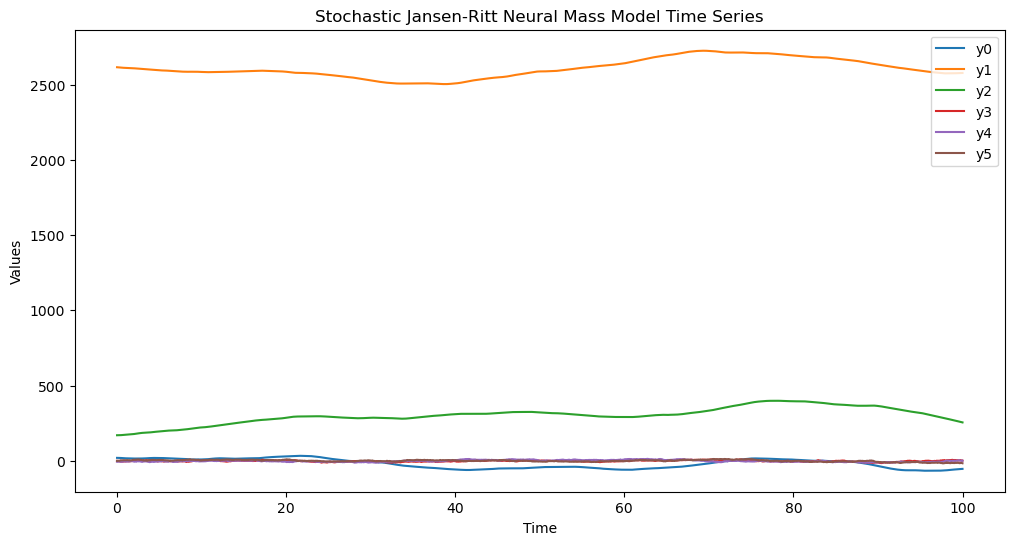

In [473]:
# Extract the time series data from the results
time = np.array([t for t, _ in results])
variables = np.array([y for _, y in results])

y0_vals = variables[:, 0]
y1_vals = variables[:, 1]
y2_vals = variables[:, 2]
y3_vals = variables[:, 3]
y4_vals = variables[:, 4]
y5_vals = variables[:, 5]

# Plot the time series for each state variable
plt.figure(figsize=(12, 6))

plt.plot(time, y0_vals, label='y0')
plt.plot(time, y1_vals, label='y1')
plt.plot(time, y2_vals, label='y2')
plt.plot(time, y3_vals, label='y3')
plt.plot(time, y4_vals, label='y4')
plt.plot(time, y5_vals, label='y5')

plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Stochastic Jansen-Ritt Neural Mass Model Time Series')
plt.legend(loc='upper right')

plt.show()


__I here would like to emphasize that the results above differ from TVB for a variety of reasons. Such as: TVB adds noise on a global level, and the individual neural masses receive input from other neural masses as mediated by the SC matrix and time delays depending on how far away the neural masses are away from each other. This lack of instantaneity is integral to brain activity.__

So without further adue, let's dive into TVB: 

## 5. TVB integrator comparison

Here, we look into how the different numerical integrators perform when comparing them to each other in TVB. 




In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from tvb.simulator.lab import *
import time 
import os

from simulation import *
from stimulus import *
from visualise import *

In [2]:
# SIMULATION LENGTH
sim_duration = 2500

# CONNECTIVITY
# Normalize (to reduce outliers in weights) the SC weights like in Triebkorn et al. 2020
weights_hcp=np.log(np.loadtxt('./requirements/HCP_connectome/weights_HCP.txt')+1)   # SCnew = log(SC+1)
weights_new=weights_hcp/weights_hcp.max()               # Normalize
white_matter = connectivity.Connectivity(
    tract_lengths=np.loadtxt('./requirements/HCP_connectome/tract_lengths_HCP.txt'),
    weights=weights_new,
    region_labels=np.loadtxt('./requirements/HCP_connectome/region_labels_HCP.txt', dtype=str),
    centres=np.array([0]))
white_matter.speed = np.array([3.0])
white_matter.configure()

# NEURAL MASS MODEL - Jansen Rit extended
from tvb.basic.neotraits.api import NArray, List, Range
class ExtendedJansenRit(models.JansenRit):
    variables_of_interest = List(of=str, label="Variables watched by Monitors", choices=(['y1-y2', 'y0','y1','y2','y3','y4','y5']), default=(['y1-y2']))
neuron_model = ExtendedJansenRit(
                    v0 = np.array([6.]),
                    a_1=np.array([0.78]),
                    a_2=np.array([0.39]),
                    a_3=np.array([0.25]),
                    a_4=np.array([0.246]))
neuron_model.configure()

# COUPLING
white_matter_coupling = coupling.SigmoidalJansenRit(a=np.array([0.3]))
white_matter_coupling.configure()


# INTEGRATOR
dtx = 1.0



# MONITORS
mon_raw = monitors.Raw()
mon_raw.configure()
mon_tavg = monitors.TemporalAverage(period=10.0)
mon_tavg.configure()
all_mons = (mon_raw, mon_tavg)
monitors_needed = ["raw"]

# INITIAL CONDITIONS
# same shape as history - [timepoints, state_variables, nodes, modes]
init = np.random.rand(1,6,white_matter.weights.shape[0],1) # region based simulations

integrator_list = [
    #integrators.IntegratorStochastic,
    integrators.HeunDeterministic,
    integrators.HeunStochastic,
    integrators.EulerStochastic,
    integrators.RungeKutta4thOrderDeterministic,
    integrators.VODE,
    integrators.VODEStochastic,
    integrators.Dopri5,
    integrators.Dopri5Stochastic,
    integrators.Dop853,
    integrators.Dop853Stochastic
]


In [3]:
import time 

execution_times =[]
results = {} 

for integrator_class in integrator_list:
    
    integrator_instance = integrator_class()

    start_time = time.time()
    
    # Configures the simulator with the current integrator
    sim = simulator.Simulator(
        model=neuron_model,
        connectivity=white_matter,
        coupling=white_matter_coupling,
        integrator=integrator_instance,
        monitors=all_mons,
        initial_conditions=init,
        #stimulus=stim
    )
    sim.configure()
    
    # Runs the simulation and store the results with a fitting name
    sim_results = run_simulation(sim, sim_duration, monitors_needed)
    raw_data, raw_time =    np.squeeze(sim_results['raw']['data']), sim_results['raw']['time']
    #tavg_data, tavg_time =  np.squeeze(sim_results['tavg']['data']), sim_results['tavg']['time']

     
    end_time = time.time()
    execution_time = end_time - start_time
    execution_times.append(execution_time)
    
    integrator_name = integrator_class.__name__
    results[integrator_name] = {
        'raw_data': raw_data,
        'raw_time': raw_time,
        #'tavg_data': tavg_data,
        #'tavg_time': tavg_time
    }

    filename = f"{integrator_name}_timeseries.txt"
    filepath = os.path.join('./timeseries', filename)
    np.savetxt(filepath, raw_data)
    print(f"{integrator_name} execution time: {execution_time:.4f} seconds")

WARNING  random_state supplied for non-stochastic integration
HeunDeterministic execution time: 1458.5266 seconds


/opt/anaconda3/envs/TVB_SimNIBS/lib/python3.10/site-packages/numba/np/ufunc/gufunc.py:170: RuntimeWarning: overflow encountered in _numba_dfun_jr
  return self.ufunc(*args, **kwargs)


HeunStochastic execution time: 1481.4243 seconds
EulerStochastic execution time: 1464.9792 seconds
WARNING  random_state supplied for non-stochastic integration
RungeKutta4thOrderDeterministic execution time: 39674.9763 seconds
WARNING  random_state supplied for non-stochastic integration
VODE execution time: 1441.1670 seconds
VODEStochastic execution time: 1523.4935 seconds
WARNING  random_state supplied for non-stochastic integration
Dopri5 execution time: 1503.1779 seconds
Dopri5Stochastic execution time: 1541.2639 seconds
WARNING  random_state supplied for non-stochastic integration
Dop853 execution time: 1529.9399 seconds
Dop853Stochastic execution time: 1553.4710 seconds


The graph below shows how using different numerical integrators influences the computational time in a TVB simulation. 

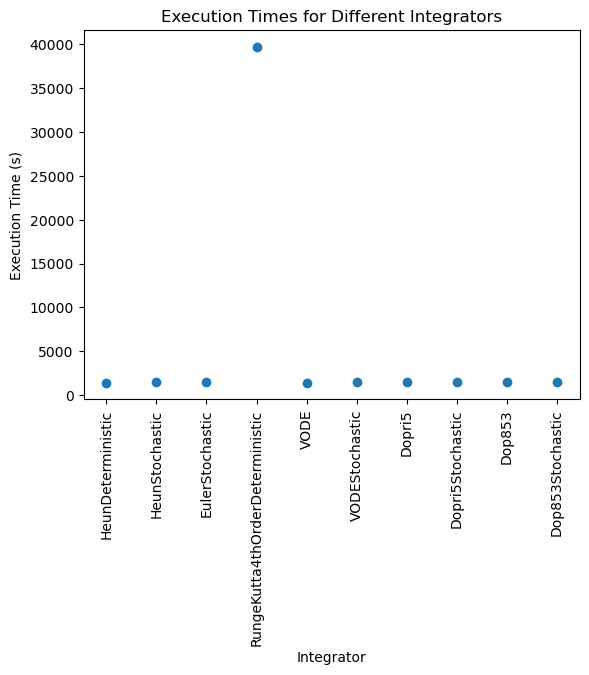

In [22]:


integrator_names = list(results.keys())
plt.scatter(integrator_names, execution_times)
plt.xticks(rotation=90)
plt.xlabel('Integrator')
plt.ylabel('Execution Time (s)')
plt.title('Execution Times for Different Integrators')
plt.show()


Next, let's display the time series: 

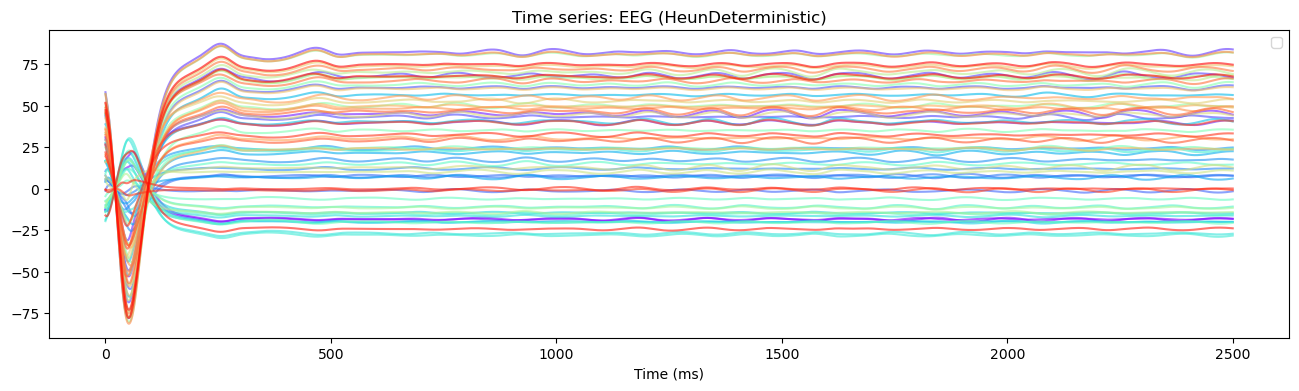

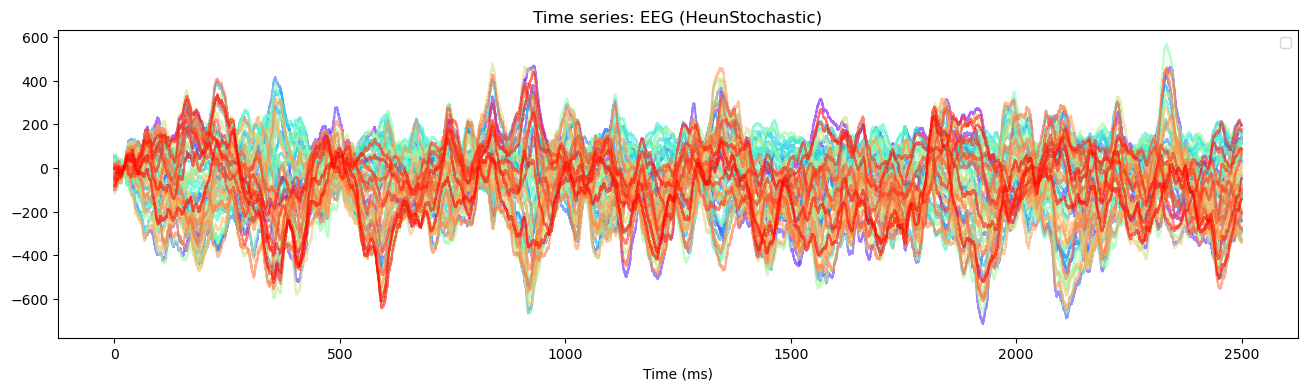

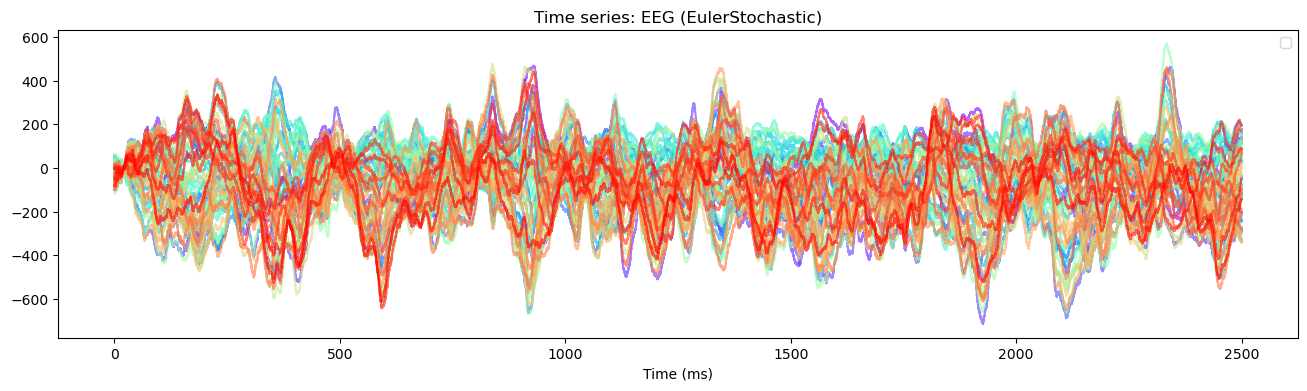

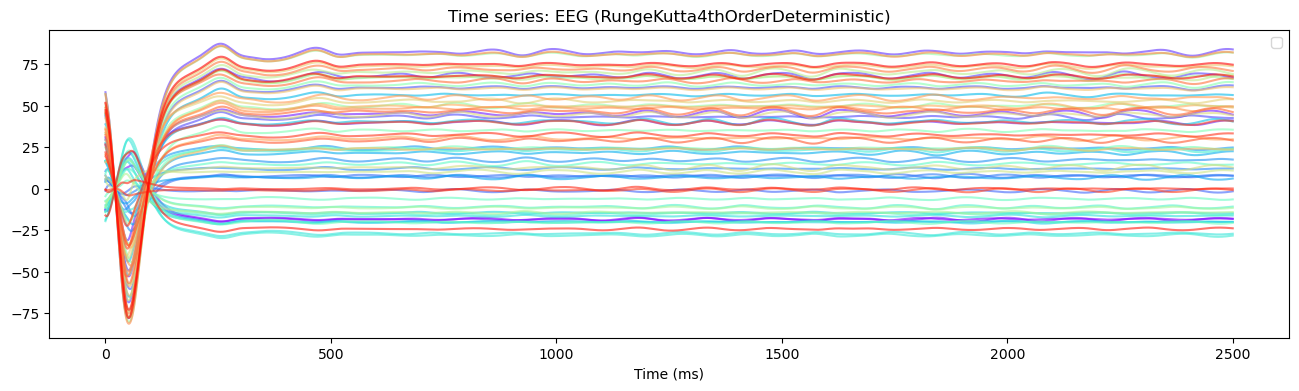

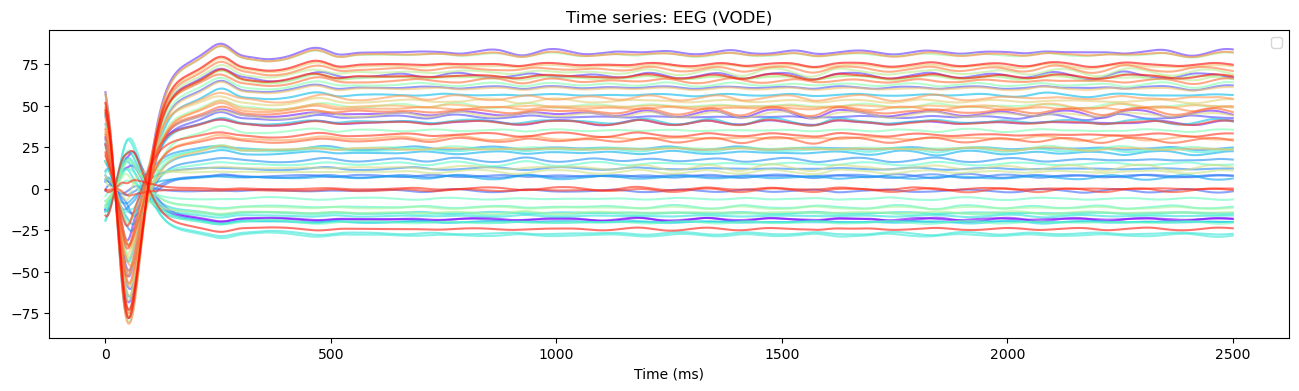

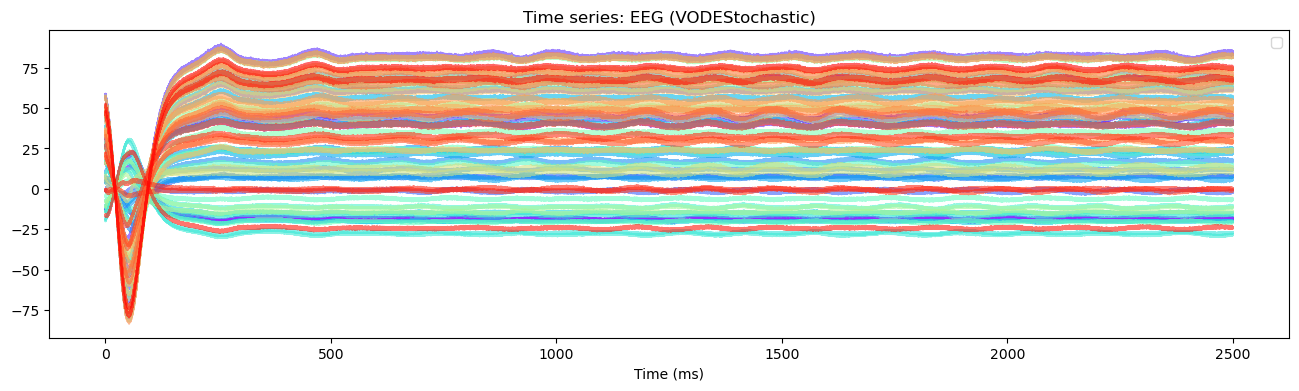

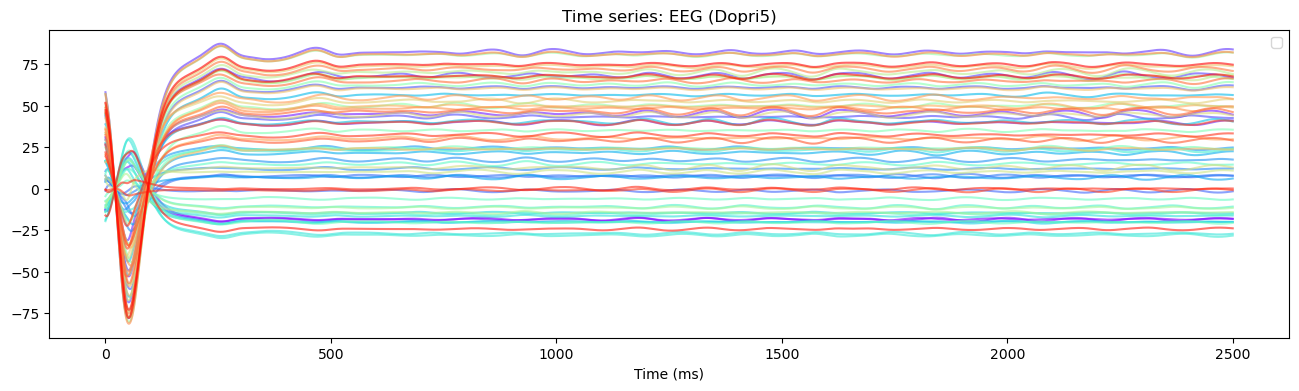

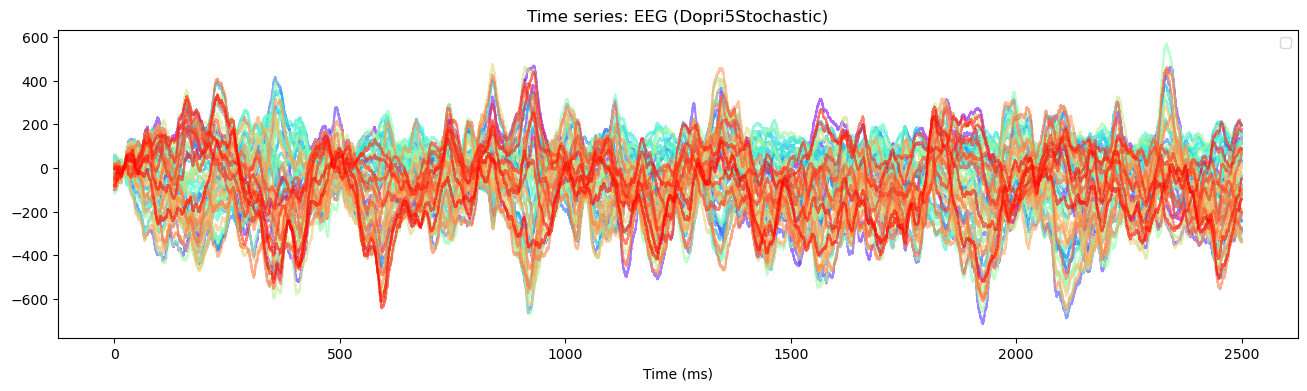

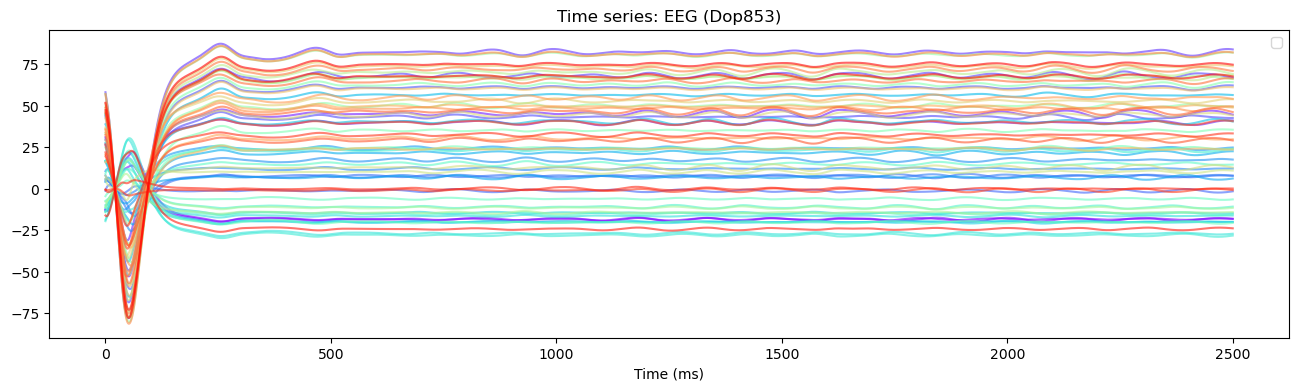

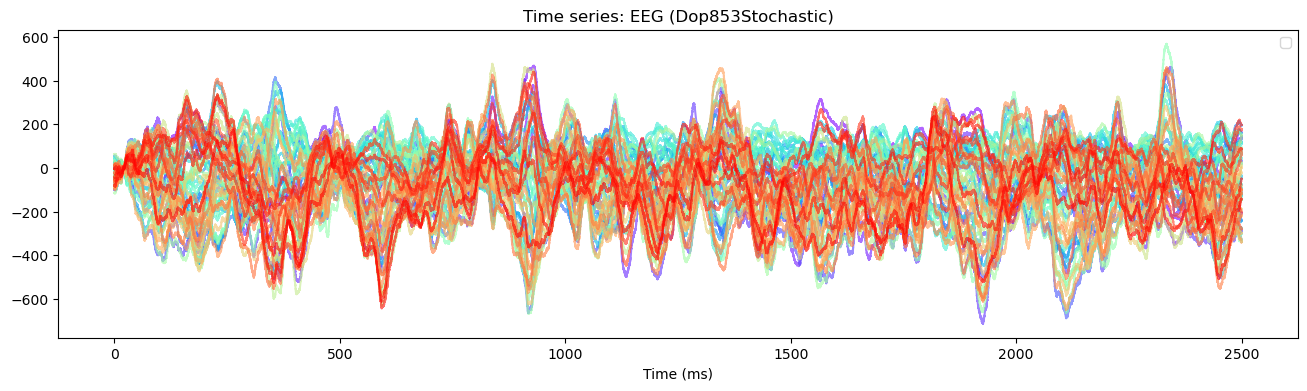

In [8]:
for integrator_name, eeg_data in eeg_data_dict.items():
    plt.figure(figsize=(16, 4))
    color = iter(cm.rainbow(np.linspace(0, 1, len(eeg_data[0]))))
    for i in range(len(channels)):
        col = next(color)
        plt.plot(raw_time, (eeg_data[:, i] - np.mean(eeg_data[1500:1950, i])), c=col, alpha=0.6)
    plt.title(f"Time series: EEG ({integrator_name})")
    plt.xlabel("Time (ms)")
    #plt.axvline(x=stim_onset, color='r', linestyle='--', label='Stimulus')
    #plt.xlim(stim_onset-200, stim_onset+400)
    
    # Get the minimum and maximum values of the plotted data
    ymin, ymax = plt.ylim()
    for i in range(len(channels)):
        ymin_new = np.min(eeg_data[:, i] - np.mean(eeg_data[1500:1950, i]))
        ymax_new = np.max(eeg_data[:, i] - np.mean(eeg_data[1500:1950, i]))
        ymin = min(ymin, ymin_new)
        ymax = max(ymax, ymax_new)
    
    # Set the y-axis limits to encompass the minimum and maximum values
    plt.ylim(ymin, ymax)
    
    plt.legend()
    plt.show()

Here, we can single out individual channels in order to see if there are differences between them depending on which integrator was used. 

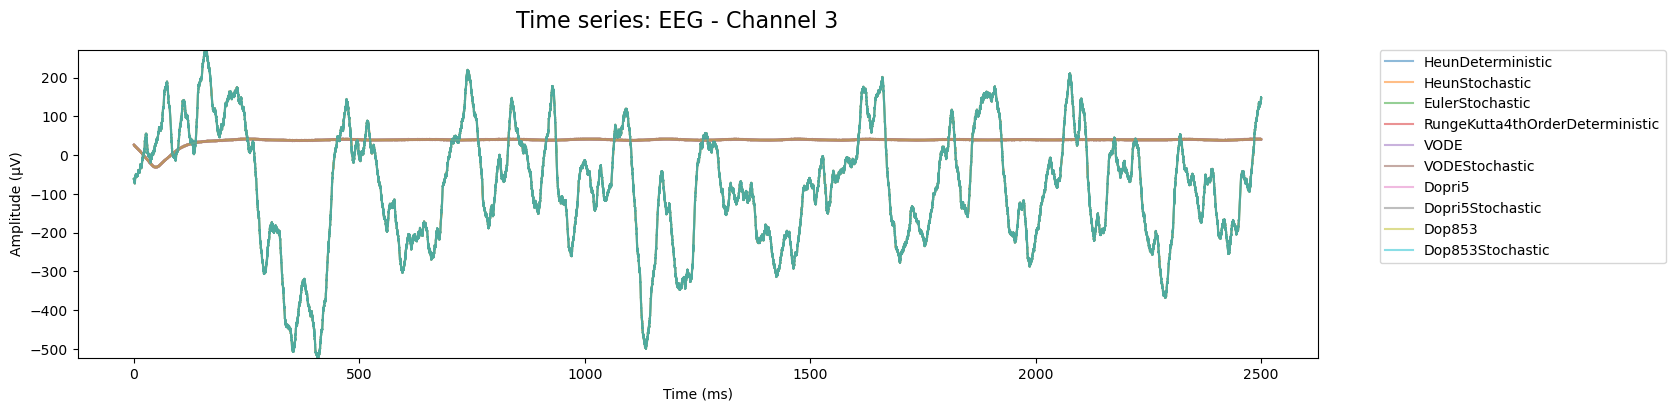

In [476]:
fig, ax = plt.subplots(figsize=(16, 4))
fig.suptitle(f"Time series: EEG - Channel {channel_index}", fontsize=16)

# Initialize min and max values to the y-axis limits
ymin, ymax = ax.get_ylim()

for integrator_name, eeg_data in eeg_data_dict.items():
    ax.plot(raw_time, (eeg_data[:, channel_index] - np.mean(eeg_data[1500:1950, channel_index])),
            label=integrator_name, alpha=0.5)

    # Update min and max values
    ymin_new = np.min(eeg_data[:, channel_index] - np.mean(eeg_data[1500:1950, channel_index]))
    ymax_new = np.max(eeg_data[:, channel_index] - np.mean(eeg_data[1500:1950, channel_index]))
    ymin = min(ymin, ymin_new)
    ymax = max(ymax, ymax_new)

# Set the y-axis limits to encompass the minimum and maximum values
ax.set_ylim(ymin, ymax)

ax.set_xlabel("Time (ms)")
ax.set_ylabel("Amplitude (µV)")
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.show()


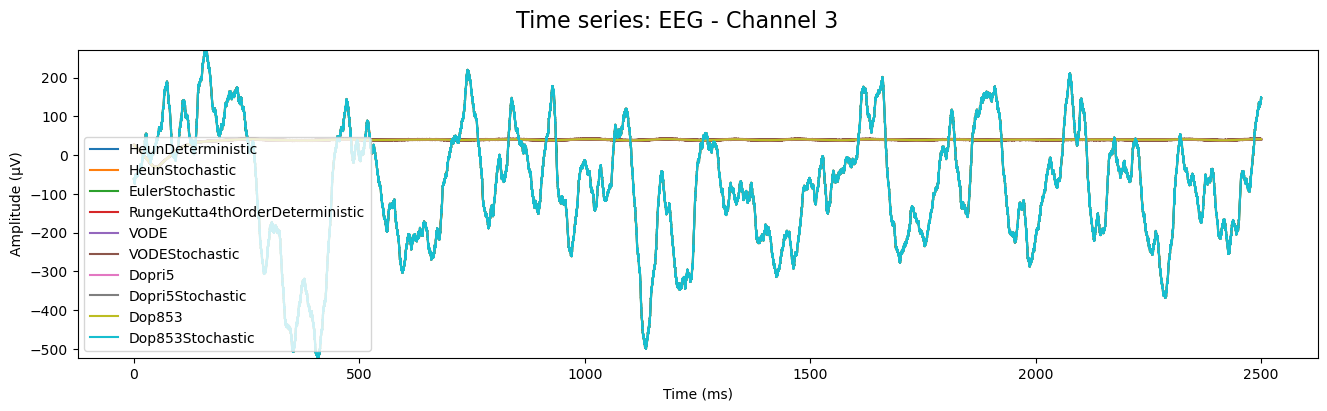

In [11]:
fig, ax = plt.subplots(figsize=(16, 4))
fig.suptitle(f"Time series: EEG - Channel {channel_index}", fontsize=16)

# Initialize min and max values to the y-axis limits
ymin, ymax = ax.get_ylim()

for integrator_name, eeg_data in eeg_data_dict.items():
    ax.plot(raw_time, (eeg_data[:, channel_index] - np.mean(eeg_data[1500:1950, channel_index])), label=integrator_name)

    # Update min and max values
    ymin_new = np.min(eeg_data[:, channel_index] - np.mean(eeg_data[1500:1950, channel_index]))
    ymax_new = np.max(eeg_data[:, channel_index] - np.mean(eeg_data[1500:1950, channel_index]))
    ymin = min(ymin, ymin_new)
    ymax = max(ymax, ymax_new)

# Set the y-axis limits to encompass the minimum and maximum values
ax.set_ylim(ymin, ymax)

ax.set_xlabel("Time (ms)")
ax.set_ylabel("Amplitude (µV)")
ax.legend()
plt.show()

Finally, we take a look at by how much the different integrators compare to each other. It is important to remember that these value are not to be taken as ultimate, but rather are values that can fluctuate depending on how we set the noise, and a variety of other different initial conditions and parameters. I would suggest playing around with the different settings yourself and finding out how the table displayed below changes accordingly. 

Below, the correlation table for different integrators for a channel (which you can set with channel_index=) is displayed. 

In [20]:
def calculate_results_correlation(results, channel_index=3):
    corr_coef = {}
    
    for integrator_name_i, result_i in results.items():
        corr_coef[integrator_name_i] = {}
        for integrator_name_j, result_j in results.items():
            corr = np.corrcoef(result_i['raw_data'][:, channel_index], result_j['raw_data'][:, channel_index])[0, 1]
            corr_coef[integrator_name_i][integrator_name_j] = corr
    
    # Convert the nested dictionary to a Pandas DataFrame
    df = pd.DataFrame.from_dict(corr_coef)
    
    return df

correlation_table = calculate_results_correlation(results, channel_index=3)
display(correlation_table)


HeunDeterministic  HeunStochastic  \
HeunDeterministic                         1.000000       -0.149913   
HeunStochastic                           -0.149913        1.000000   
EulerStochastic                          -0.149913        1.000000   
RungeKutta4thOrderDeterministic           1.000000       -0.149922   
VODE                                      1.000000       -0.149913   
VODEStochastic                            0.999412       -0.149801   
Dopri5                                    1.000000       -0.149918   
Dopri5Stochastic                         -0.149880        1.000000   
Dop853                                    1.000000       -0.149919   
Dop853Stochastic                         -0.149880        1.000000   

                                 EulerStochastic  \
HeunDeterministic                      -0.149913   
HeunStochastic                          1.000000   
EulerStochastic                         1.000000   
RungeKutta4thOrderDeterministic        -0.149922   
VODE                                   -0.149913   
VODEStochastic                         -0.149801   
Dopri5                                 -0.149918   
Dopri5Stochastic                        1.000000   
Dop853                                 -0.149919   
Dop853Stochastic                        1.000000   

                                 RungeKutta4thOrderDeterministic      VODE  \
HeunDeterministic                                       1.000000  1.000000   
HeunStochastic                                         -0.149922 -0.149913   
EulerStochastic                                        -0.149922 -0.149913   
RungeKutta4thOrderDeterministic                         1.000000  1.000000   
VODE                                                    1.000000  1.000000   
VODEStochastic                                          0.999412  0.999413   
Dopri5                                                  1.000000  1.000000   
Dopri5Stochastic                                       -0.149889 -0.149879   
Dop853                                                  1.000000  1.000000   
Dop853Stochastic                                       -0.149889 -0.149879   

                                 VODEStochastic    Dopri5  Dopri5Stochastic  \
HeunDeterministic                      0.999412  1.000000         -0.149880   
HeunStochastic                        -0.149801 -0.149918          1.000000   
EulerStochastic                       -0.149801 -0.149918          1.000000   
RungeKutta4thOrderDeterministic        0.999412  1.000000         -0.149889   
VODE                                   0.999413  1.000000         -0.149879   
VODEStochastic                         1.000000  0.999412         -0.149767   
Dopri5                                 0.999412  1.000000         -0.149884   
Dopri5Stochastic                      -0.149767 -0.149884          1.000000   
Dop853                                 0.999412  1.000000         -0.149885   
Dop853Stochastic                      -0.149767 -0.149884          1.000000   

                                   Dop853  Dop853Stochastic  
HeunDeterministic                1.000000         -0.149880  
HeunStochastic                  -0.149919          1.000000  
EulerStochastic                 -0.149919          1.000000  
RungeKutta4thOrderDeterministic  1.000000         -0.149889  
VODE                             1.000000         -0.149879  
VODEStochastic                   0.999412         -0.149767  
Dopri5                           1.000000         -0.149884  
Dopri5Stochastic                -0.149885          1.000000  
Dop853                           1.000000         -0.149885  
Dop853Stochastic                -0.149885          1.000000

## 5.1 Noise in TVB 

>So when should I add noise in TVB? 
+ Noise can be added in TVB to better mimic real brain activity, which is variable and stochastic nature. 
+ Biological feasability: The human brain is an intrinsicically noisy processor. This is due to various factors, such as ion channel noise, and fluctuations in the firing rates of neurons.
+ Robustness: Noise can be used to test the robustness of the simulated brain network to perturbations. By introducing noise into the system, you can observe how the network responds to different levels of variability.
+ Computational stability: In some cases, adding noise can improve the computational stability of a simulation in TVB. This is the case when the underlying mathematicla model (such as the NMM) is particularly sensitive to small changes in initial conditions. 
+ Model exploration: Adding noise can also help explore the models parameter space and the potential dynamics that can emerge from the simulated brain network. 

In summary, adding noise depends on the specifc goals of your study or simulation. 
If you are trying to build a biologically feasible simulation, adding noise can be benefical. However, if your foremost goal is to  study the deterministic behavior of a specific model or the precise mechanisms underlying a particular phenomenon, then adding noise might not be necessary.

>How much and what noise should I add? 
+ Noise can be added to the neural mass models using various stochastic processes. One common approach is to use Gaussian white noise, characterized by a mean (μ) and a standard deviation (σ). To make the noise biologically feasible, it is essential to select appropriate values for these parameters.

In general, I would recommend following these three principles when adding noise to a simulation:
+ Literature review: Consult relevant experimental and computational neuroscience literature to determine the range of noise levels.
+ Model validation: Compare the output of your model with experimental data or other well-established models to check whether the noise level in your simulation generates realistic neural dynamics
+ Sensitivity analysis: Perform a sensitivity analysis to study how the model's behavior changes with varying levels of noise. This can help you understand the impact of noise on the system.

>How do I add noise in TVB? 
+ This can be done using the class of the same title 'noise'. 
+ Different types of noise can be added, and parameters should be specified according to the simulation. 



## 5.2 Which integrator should I use in TVB?

As can be seen in this chapter, which integrator to use depends very much on what the specifics of your simulation goals are. 

I suggest that you change that you may change the length of the simulation and observe if there is any change in the correlation values between the different integrator results. 
As a next step, you should then weight the accuracy of the integrator against how similar their outputs are and finally, how long their individual run-time is. 

In other words: Keep in mind that more accurate methods usually require more computations, which could slow down your simulation. It's essential to strike a balance between accuracy and computational efficiency based on your specific needs.
